<a href="https://colab.research.google.com/github/rdshyamvijay/Inventory-management/blob/main/Inventory_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset (replace with the dataset you're using)
df = pd.read_csv('/content/drive/MyDrive/Retail Inventory/inventory_data.csv')

# Display the first few rows of the dataset
print(df.head())

   Store        Date                       Product  Weekly_Sales  \
0      1  05-02-2010      Blueberry scented candle    1643690.90   
1      4  12-02-2010  Stainless steel water bottle    1641957.44   
2      5  19-02-2010         Leather messenger bag    1611968.17   
3      2  26-02-2010           Organic coconut oil    1409727.59   
4      3  05-03-2010    Bluetooth wireless earbuds    1554806.68   

   inventory level  Temperature  Past promotion of product in lac  \
0                0        42.31                             2.572   
1                1        38.51                             2.548   
2                0        39.93                             2.514   
3                0        46.63                             2.561   
4                0        46.50                             2.625   

   demand forecast  
0            8.106  
1            8.106  
2            8.106  
3            8.106  
4            8.106  


In [2]:
# Print column names as a list
print(list(df.columns))

['Store', 'Date', 'Product', 'Weekly_Sales', 'inventory level', 'Temperature', 'Past promotion of product in lac', 'demand forecast']


In [4]:

# Load your dataset
# Assuming it's loaded into a DataFrame named 'df'
# df = pd.read_csv('your_file.csv')  # Uncomment and replace with your actual file path

# Convert 'Date' column to datetime with the correct format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Check the first few rows to ensure the conversion worked
print(df['Date'].head())


0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: Date, dtype: datetime64[ns]


In [5]:

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Check the data structure after preprocessing
print(df.info())

Store                               0
Date                                0
Product                             0
Weekly_Sales                        0
inventory level                     0
Temperature                         0
Past promotion of product in lac    0
demand forecast                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Store                             499 non-null    int64         
 1   Date                              499 non-null    datetime64[ns]
 2   Product                           499 non-null    object        
 3   Weekly_Sales                      499 non-null    float64       
 4   inventory level                   499 non-null    int64         
 5   Temperature                       499 non-null    float64       
 6   Past promotion

In [6]:
# Create a lag feature for 'Weekly_Sales' to capture the effect of last week's sales on current inventory level
df['Sales_Lag_1'] = df['Weekly_Sales'].shift(1)

# Drop rows where lagged values are NaN (due to shifting)
df = df.dropna()

# Define the features (X) and the target variable (y)
X = df[['Weekly_Sales', 'Temperature', 'Past promotion of product in lac', 'demand forecast', 'Sales_Lag_1']]
y = df['inventory level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the features and target
print(X_train.head(), y_train.head())

     Weekly_Sales  Temperature  Past promotion of product in lac  \
57     1553191.63        53.56                             3.459   
228    1669299.78        75.58                             3.467   
281    1746470.56        79.45                             3.666   
486    2039818.41        50.93                             3.461   
221    1876704.26        93.34                             3.684   

     demand forecast  Sales_Lag_1  
57             7.742   1636263.41  
228            7.852   1691439.52  
281            6.565   1829415.67  
486            6.510   2103455.75  
221            7.852   1680693.06   57     0
228    0
281    0
486    0
221    0
Name: inventory level, dtype: int64


Mean Squared Error: 0.08551299999999999


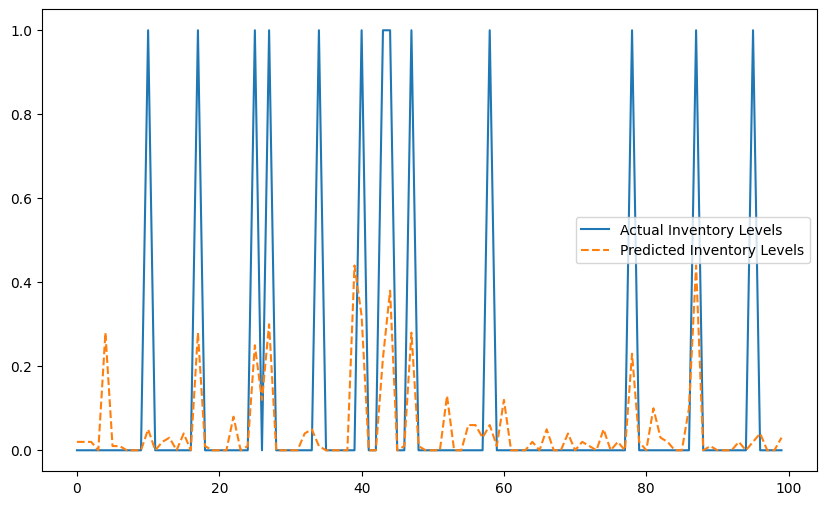

In [7]:
# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the actual vs predicted inventory levels
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Inventory Levels')
plt.plot(y_pred, label='Predicted Inventory Levels', linestyle='--')
plt.legend()
plt.show()